In [ ]:
import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Activation, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [ ]:
!unzip -q shapes.zip

## Reading the dataset and assigning them labels

In [ ]:
#PATH for shape forlder
PATH = "shapes/" 
IMG_SIZE = 64
Shapes = ["circle", "square", "triangle", "star"]
Labels = []
Dataset = []

# From kernel: https://www.kaggle.com/smeschke/load-data
for shape in Shapes:
    print("Getting data for: ", shape)
    #iterate through each file in the folder
    for path in os.listdir(PATH + shape):
        #add the image to the list of images
        image = cv2.imread(PATH + shape + '/' + path)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
        Dataset.append(image)
        #add an integer to the labels list 
        Labels.append(Shapes.index(shape))

print("\nDataset Images size:", len(Dataset))
print("Image Shape:", Dataset[0].shape)
print("Labels size:", len(Labels))

Getting data for:  circle
Getting data for:  square
Getting data for:  triangle
Getting data for:  star

Dataset Images size: 14970
Image Shape: (64, 64, 3)
Labels size: 14970


## Display some random figures withh labels

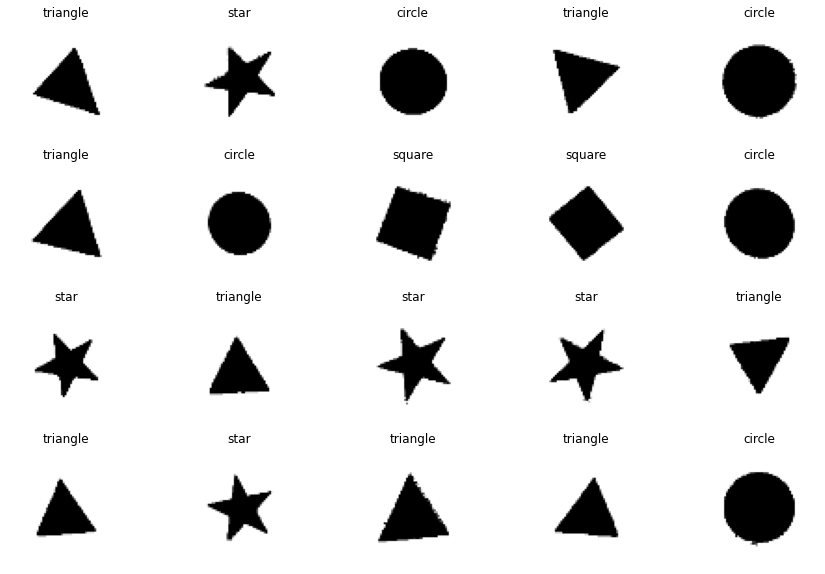

In [ ]:
index = np.random.randint(0, len(Dataset) - 1, size= 20)
plt.figure(figsize=(15,10))

for i, ind in enumerate(index, 1):
    img = Dataset[ind]
    lab = Labels[ind]
    lab = Shapes[lab]
    plt.subplot(4, 5, i)
    plt.title(lab)
    plt.axis('off')
    plt.imshow(img)

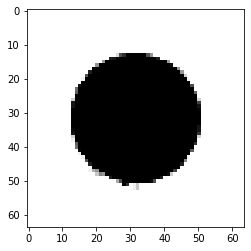

In [ ]:
index = 42
plt.imshow(Dataset[index])

## Printing the count of each classes

In [ ]:
print("Count of Star images:", Labels.count(Shapes.index("star")))
print("Count of Circles images:", Labels.count(Shapes.index("circle")))
print("Count of Squares images:", Labels.count(Shapes.index("square")))
print("Count of Triangle images:", Labels.count(Shapes.index("triangle")))

Count of Star images: 3765
Count of Circles images: 3720
Count of Squares images: 3765
Count of Triangle images: 3720


## Normalizing and spliting the dataset into train/test

In [ ]:
Dataset = np.array(Dataset)
Dataset = Dataset.astype("float32") / 255.0
# One hot encode labels
Labels = np.array(Labels)
Labels = to_categorical(Labels)
# Split Dataset to train\test
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10
trainX, testX, trainY, testY = train_test_split(Dataset, Labels, test_size=1 - train_ratio, random_state=1)
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=test_ratio/(test_ratio + validation_ratio), random_state=1)
print("X Train shape:", trainX.shape)
print("X Test shape:", testX.shape)
print("X Val shape:", valX.shape)
print("Y Train shape:", trainY.shape)
print("Y Test shape:", testY.shape)
print("Y Val shape:", valY.shape)

X Train shape: (6736, 64, 64, 3)
X Test shape: (3743, 64, 64, 3)
X Val shape: (4491, 64, 64, 3)
Y Train shape: (6736, 4)
Y Test shape: (3743, 4)
Y Val shape: (4491, 4)


## Creating a modified LeNet Model

In [ ]:
numChannels = 3
activation= "relu"
numClasses = 4
model = Sequential()
inputShape = (IMG_SIZE, IMG_SIZE, numChannels)
model.add(Conv2D(filters= 6, kernel_size= 5, input_shape= inputShape))
model.add(Activation(activation))
model.add(MaxPooling2D(pool_size= (2, 2), strides= (2, 2)))
model.add(Conv2D(filters= 16, kernel_size= 5))
model.add(Activation(activation))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# Flatten -> FC 120 -> Dropout -> Activation
model.add(Flatten())
model.add(Dense(120))
model.add(Dropout(0.5))
model.add(Activation(activation))

# FC 84 -> Dropout -> Activation
model.add(Dense(84))
model.add(Dropout(0.5))
model.add(Activation(activation))

# FC 4-> Softmax
model.add(Dense(numClasses))
model.add(Activation("softmax"))
BS = 120
LR = 0.01
EPOCHS = 10
opt = SGD(lr= LR)
model.compile(loss= "categorical_crossentropy", optimizer= opt, metrics= ["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 60, 60, 6)         456       
_________________________________________________________________
activation_6 (Activation)    (None, 60, 60, 6)         0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 16)        2416      
_________________________________________________________________
activation_7 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2704)             

In [ ]:
history = model.fit(trainX, trainY, validation_data= (valX, valY), batch_size= BS,epochs= EPOCHS, verbose=1)


Train on 6736 samples, validate on 4491 samples
Epoch 1/10
6736/6736 [==============================] - 1s 157us/step - loss: 1.3484 - accuracy: 0.3762 - val_loss: 1.2627 - val_accuracy: 0.6473
Epoch 2/10
6736/6736 [==============================] - 1s 110us/step - loss: 1.1363 - accuracy: 0.5420 - val_loss: 0.8149 - val_accuracy: 0.7573
Epoch 3/10
6736/6736 [==============================] - 1s 107us/step - loss: 0.7826 - accuracy: 0.6822 - val_loss: 0.4209 - val_accuracy: 0.9437
Epoch 4/10
6736/6736 [==============================] - 1s 110us/step - loss: 0.5477 - accuracy: 0.7843 - val_loss: 0.2462 - val_accuracy: 0.9593
Epoch 5/10
6736/6736 [==============================] - 1s 108us/step - loss: 0.3967 - accuracy: 0.8496 - val_loss: 0.1203 - val_accuracy: 0.9915
Epoch 6/10
6736/6736 [==============================] - 1s 109us/step - loss: 0.2902 - accuracy: 0.8979 - val_loss: 0.1483 - val_accuracy: 0.9662
Epoch 7/10
6736/6736 [==============================] - 1s 106us/step - loss

In [ ]:
# Evaluate the train and test data
scores_train = model.evaluate(trainX, trainY, verbose= 1)
scores_test = model.evaluate(testX, testY, verbose= 1)
print("\nModel Accuracy on Train Data: %.2f%%" % (scores_train[1]*100))
print("Model Accuracy on Test Data: %.2f%%" % (scores_test[1]*100))

3743/3743 [==============================] - 0s 112us/step

Model Accuracy on Train Data: 99.88%
Model Accuracy on Test Data: 99.84%


In [ ]:
y_pred = model.predict(testX)

In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(testY.argmax(axis=1), y_pred.argmax(axis=1))

In [ ]:

matrix

array([[940,   6,   0,   0],
       [  0, 920,   0,   0],
       [  0,   0, 911,   0],
       [  0,   0,   0, 966]])

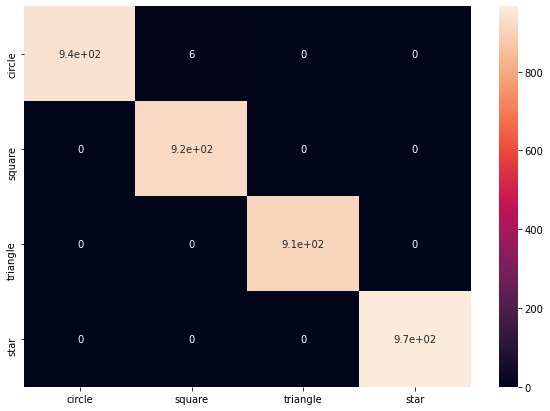

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(matrix, index = ["circle", "square", "triangle", "star"],
                  columns = ["circle", "square", "triangle", "star"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [ ]:

history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

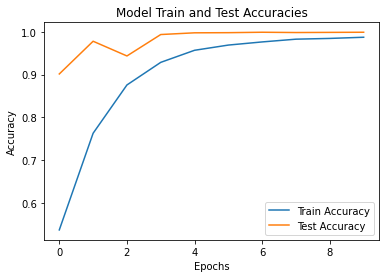

In [ ]:
plt.plot(np.arange(0, EPOCHS), history.history["accuracy"], label="Train Accuracy")
plt.plot(np.arange(0, EPOCHS), history.history["val_accuracy"], label="Test Accuracy")
plt.title("Model Train and Test Accuracies")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.show()

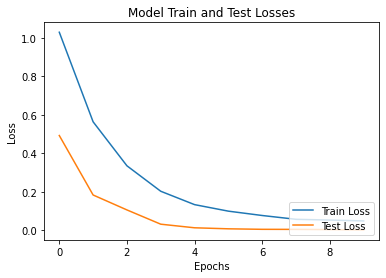

In [ ]:
plt.plot(np.arange(0, EPOCHS), history.history["loss"], label="Train Loss")
plt.plot(np.arange(0, EPOCHS), history.history["val_loss"], label="Test Loss")
plt.title("Model Train and Test Losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="lower right")
plt.show()